Energy of Solitonic Potential: -207452.628527
Energy of Newtonian Potential: -20611.948099
Overlap Integral between Solitonic and Newtonian Potentials: 4463.231405


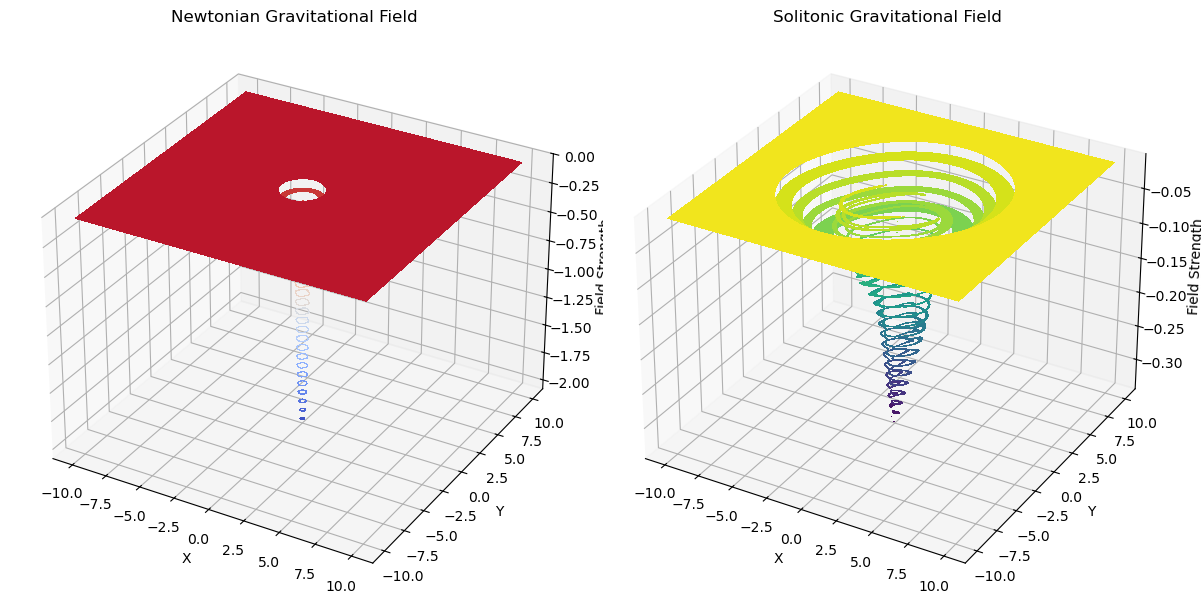

In [1]:
# visualize and numerically analyze Newtonian Gravitational Field Potential vs Solitonic Gravitational Field Potential
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D grid
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
Z = np.linspace(-10, 10, 100)
x, y, z = np.meshgrid(X, Y, Z)

# Define soliton parameters
A1, A2 = 1.5, 1.2
w1, w2 = 1.5, 1.3
A_dark = -1.0
w_dark = 2.0

# Construct solitonic wavefunctions
psi_bright_1 = A1 * np.cosh(np.sqrt((x - 1.0)**2 + (y - 1.0)**2) / w1)**-1 * np.exp(1j * 1.2 * z)
psi_bright_2 = A2 * np.cosh(np.sqrt((x + 1.5)**2 + (y + 1.5)**2) / w2)**-1 * np.exp(1j * 0.8 * z)
psi_dark = A_dark * np.tanh(np.sqrt(x**2 + y**2) / w_dark)

# Combine and normalize solitonic wavefunction
psi_beta_3D = psi_bright_1 + psi_bright_2 + psi_dark
psi_beta_3D /= np.linalg.norm(psi_beta_3D)

# Compute effective potential from solitonic structure
prob_density = np.abs(psi_beta_3D)**2
V_solitonic = -prob_density

# Compute Newtonian potential
G = 1.0
M = 5.0
r = np.sqrt(x**2 + y**2 + z**2) + 1e-6  # Avoid division by zero
V_newtonian = -G * M / r

# Normalize potentials for fair comparison
V_newtonian /= np.max(np.abs(V_newtonian))
V_solitonic /= np.max(np.abs(V_solitonic))

# Compute the gradients to get the effective gravitational field (force field)
# Compute gradients (derivatives)
gx_solitonic, gy_solitonic, gz_solitonic = np.gradient(V_solitonic, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])
gx_newtonian, gy_newtonian, gz_newtonian = np.gradient(V_newtonian, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])

# Compute the effective gravitational fields (negative gradient of potential)
E_solitonic = -np.sqrt(gx_solitonic**2 + gy_solitonic**2 + gz_solitonic**2)
E_newtonian = -np.sqrt(gx_newtonian**2 + gy_newtonian**2 + gz_newtonian**2)

# Calculate total energy (integral of potential)
energy_solitonic = np.sum(V_solitonic)  # Total energy of solitonic potential
energy_newtonian = np.sum(V_newtonian)  # Total energy of Newtonian potential

# Print the results for comparison
print(f"Energy of Solitonic Potential: {energy_solitonic:.6f}")
print(f"Energy of Newtonian Potential: {energy_newtonian:.6f}")

# Overlap Integral
overlap_integral = np.sum(V_solitonic * V_newtonian)
print(f"Overlap Integral between Solitonic and Newtonian Potentials: {overlap_integral:.6f}")

# Plot the results: comparison of gravitational fields in 2D slices
mid_z = 50  # Cross-section at the middle of Z

# Plot side-by-side comparison of solitonic vs Newtonian gravitational fields
fig = plt.figure(figsize=(12, 6))

# Newtonian Gravitational Field
ax1 = fig.add_subplot(121, projection='3d')
ax1.contourf(x[:, :, mid_z], y[:, :, mid_z], E_newtonian[:, :, mid_z], levels=30, cmap='coolwarm')
ax1.set_title("Newtonian Gravitational Field")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Field Strength")

# Solitonic Effective Gravitational Field
ax2 = fig.add_subplot(122, projection='3d')
ax2.contourf(x[:, :, mid_z], y[:, :, mid_z], E_solitonic[:, :, mid_z], levels=30, cmap='viridis')
ax2.set_title("Solitonic Gravitational Field")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Field Strength")

plt.tight_layout()
plt.show()


Energy of Solitonic Potential: -207452.628527
Energy of Newtonian Potential: -20611.948099
Overlap Integral between Solitonic and Newtonian Potentials: 4463.231405
Mean Force Field Difference: -0.034069
Standard Deviation of Force Field Difference: 0.071150
Maximum Force Field Difference: 1.991549
Minimum Force Field Difference: -0.580911
Mean Solitonic Curvature: 0.029605
Standard Deviation of Solitonic Curvature: 0.058763
Maximum Solitonic Curvature: 0.860132
Minimum Solitonic Curvature: 0.000030
Mean GR Curvature: -0.178124
Standard Deviation of GR Curvature: 0.692072
Maximum GR Curvature: 0.422650
Minimum GR Curvature: -56.157350
Overlap Integral between Solitonic and GR Curvature: -28516.385899


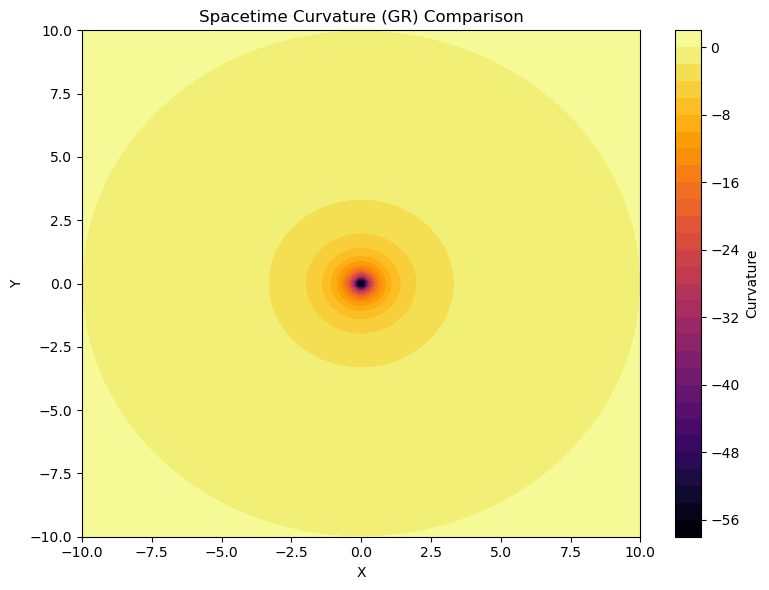

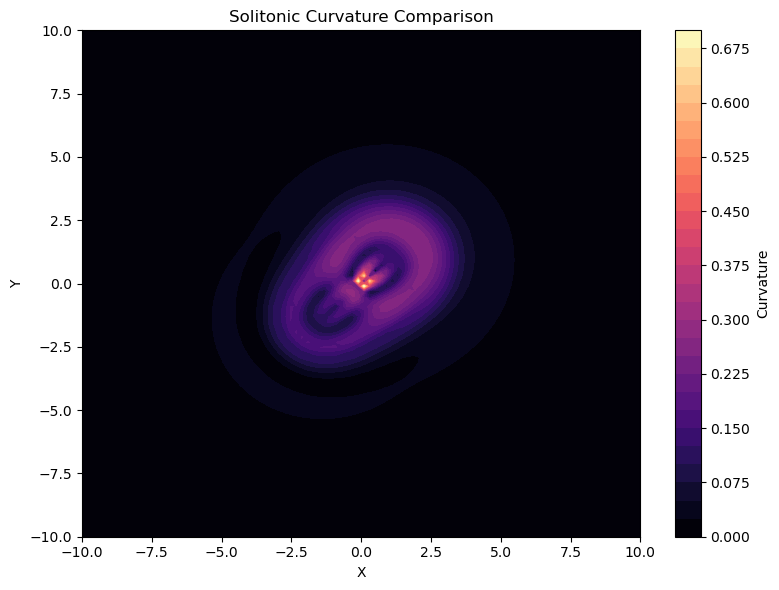

In [3]:
# For localized soliton field potential, not the full 'field' lattice-system
import numpy as np
import matplotlib.pyplot as plt

# Create 3D grid for the simulation (adjust grid size as needed)
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
Z = np.linspace(-10, 10, 100)
x, y, z = np.meshgrid(X, Y, Z)

# Define soliton parameters for the solitonic model
A1, A2 = 1.5, 1.2
w1, w2 = 1.5, 1.3
A_dark = -1.0
w_dark = 2.0

# Construct solitonic wavefunctions (bright and dark solitons)
psi_bright_1 = A1 * np.cosh(np.sqrt((x - 1.0)**2 + (y - 1.0)**2) / w1)**-1 * np.exp(1j * 1.2 * z)
psi_bright_2 = A2 * np.cosh(np.sqrt((x + 1.5)**2 + (y + 1.5)**2) / w2)**-1 * np.exp(1j * 0.8 * z)
psi_dark = A_dark * np.tanh(np.sqrt(x**2 + y**2) / w_dark)

# Combine and normalize the solitonic wavefunction
psi_beta_3D = psi_bright_1 + psi_bright_2 + psi_dark
psi_beta_3D /= np.linalg.norm(psi_beta_3D)

# Compute the effective potential from solitonic structure
prob_density = np.abs(psi_beta_3D)**2
V_solitonic = -prob_density  # Potential energy of the solitonic system

# Compute the Newtonian potential for gravitational comparison
G = 1.0  # Gravitational constant
M = 5.0  # Mass of the central object
r = np.sqrt(x**2 + y**2 + z**2) + 1e-6  # Avoid division by zero
V_newtonian = -G * M / r  # Newtonian gravitational potential

# Normalize the potentials for fair comparison
V_newtonian /= np.max(np.abs(V_newtonian))
V_solitonic /= np.max(np.abs(V_solitonic))

# Compute the gradients (first derivatives) to get the effective gravitational field (force field)
gx_solitonic, gy_solitonic, gz_solitonic = np.gradient(V_solitonic, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])
gx_newtonian, gy_newtonian, gz_newtonian = np.gradient(V_newtonian, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])

# Calculate the effective gravitational fields (negative gradient of potential)
E_solitonic = -np.sqrt(gx_solitonic**2 + gy_solitonic**2 + gz_solitonic**2)
E_newtonian = -np.sqrt(gx_newtonian**2 + gy_newtonian**2 + gz_newtonian**2)

# Compute curvature-like quantities (gravitational curvature from the gradient of the force field)
def curvature_from_gradient(field):
    """Compute curvature-like term from the gradient of the force field"""
    gradient_x, gradient_y, gradient_z = np.gradient(field, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])
    return np.sqrt(gradient_x**2 + gradient_y**2 + gradient_z**2)  # Approximation of curvature from the field gradient

# Compute curvature-like terms for the solitonic and Newtonian fields
curvature_solitonic = curvature_from_gradient(E_solitonic)
curvature_newtonian = curvature_from_gradient(E_newtonian)

# Calculate the curvature for General Relativity (Schwarzschild metric in weak-field approximation)
def schwarzschild_metric(r, G, M, c=1.0):
    """Approximate curvature using Schwarzschild metric for weak-field limit"""
    return (1 - 2 * G * M / (r * c**2))  # Curvature factor from GR

# Compute the gravitational curvature (weak-field GR curvature)
curvature_gr = schwarzschild_metric(r, G, M)

# Compute the difference in force field strengths (gravitational fields)
force_field_diff = E_solitonic - E_newtonian

# Statistical analysis: compute mean, std, max, and min values
mean_solitonic = np.mean(curvature_solitonic)
std_solitonic = np.std(curvature_solitonic)
max_solitonic = np.max(curvature_solitonic)
min_solitonic = np.min(curvature_solitonic)

mean_gr = np.mean(curvature_gr)
std_gr = np.std(curvature_gr)
max_gr = np.max(curvature_gr)
min_gr = np.min(curvature_gr)

# Compute the overlap integral of curvature between the solitonic field and GR
overlap = np.sum(curvature_solitonic * curvature_gr)

# Output the results
print(f"Energy of Solitonic Potential: {np.sum(V_solitonic):.6f}")
print(f"Energy of Newtonian Potential: {np.sum(V_newtonian):.6f}")
print(f"Overlap Integral between Solitonic and Newtonian Potentials: {np.sum(V_solitonic * V_newtonian):.6f}")
print(f"Mean Force Field Difference: {np.mean(force_field_diff):.6f}")
print(f"Standard Deviation of Force Field Difference: {np.std(force_field_diff):.6f}")
print(f"Maximum Force Field Difference: {np.max(force_field_diff):.6f}")
print(f"Minimum Force Field Difference: {np.min(force_field_diff):.6f}")

# Curvature Comparison between Solitonic and General Relativity
print(f"Mean Solitonic Curvature: {mean_solitonic:.6f}")
print(f"Standard Deviation of Solitonic Curvature: {std_solitonic:.6f}")
print(f"Maximum Solitonic Curvature: {max_solitonic:.6f}")
print(f"Minimum Solitonic Curvature: {min_solitonic:.6f}")

print(f"Mean GR Curvature: {mean_gr:.6f}")
print(f"Standard Deviation of GR Curvature: {std_gr:.6f}")
print(f"Maximum GR Curvature: {max_gr:.6f}")
print(f"Minimum GR Curvature: {min_gr:.6f}")

# Print Overlap Integral
print(f"Overlap Integral between Solitonic and GR Curvature: {overlap:.6f}")

# Plot Curvature Comparison (GR vs Solitonic)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot GR curvature
cp3 = ax.contourf(x[:, :, 50], y[:, :, 50], curvature_gr[:, :, 50], levels=30, cmap='inferno')
ax.set_title("Spacetime Curvature (GR) Comparison")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.colorbar(cp3, ax=ax, label="Curvature")
plt.tight_layout()
plt.show()

# Plot Solitonic curvature
fig, ax2 = plt.subplots(figsize=(8, 6))
cp4 = ax2.contourf(x[:, :, 50], y[:, :, 50], curvature_solitonic[:, :, 50], levels=30, cmap='magma')
ax2.set_title("Solitonic Curvature Comparison")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
fig.colorbar(cp4, ax=ax2, label="Curvature")
plt.tight_layout()
plt.show()


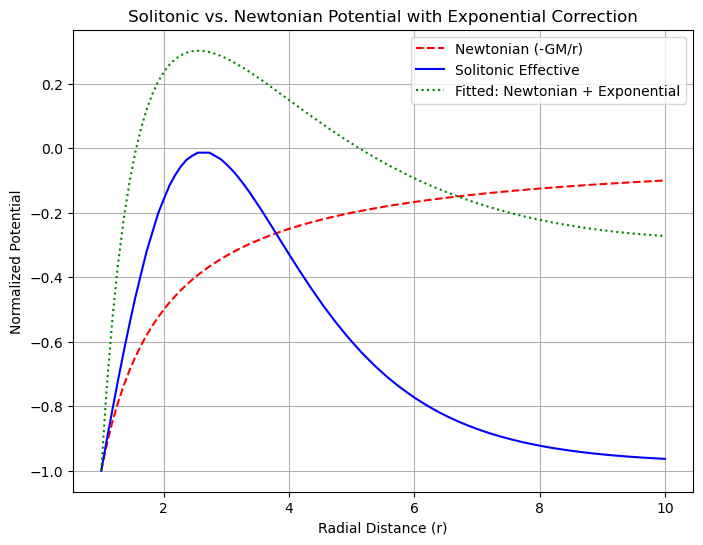

Fitted Parameters:
A = 5.398305006448898
lambda = 0.3339226674702393


In [5]:
# script to compare gravitational potential for two bright, one dark soliton to
# Newtonian gravitational potential
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import curve_fit

# Create 3D grid
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
Z = np.linspace(-10, 10, 100)
x, y, z = np.meshgrid(X, Y, Z)

# Parameters for the soliton structure
A1, A2 = 1.5, 1.2
w1, w2 = 1.5, 1.3
A_dark = -1.0
w_dark = 2.0

# Define 3D solitonic wavefunctions
psi_bright_1 = A1 * np.cosh(np.sqrt((x - 1.0)**2 + (y - 1.0)**2) / w1)**-1 * np.exp(1j * 1.2 * z)
psi_bright_2 = A2 * np.cosh(np.sqrt((x + 1.5)**2 + (y + 1.5)**2) / w2)**-1 * np.exp(1j * 0.8 * z)
psi_dark = A_dark * np.tanh(np.sqrt(x**2 + y**2) / w_dark)

# Combined solitonic wavefunction and normalize
psi_combined = psi_bright_1 + psi_bright_2 + psi_dark
psi_combined /= np.linalg.norm(psi_combined)

# Effective potential from solitonic structure (use |psi|^2)
prob_density = np.abs(psi_combined)**2
V_solitonic = -prob_density

# Standard Newtonian potential for comparison
G = 1.0
M = 5.0
r = np.sqrt(x**2 + y**2 + z**2) + 1e-6
V_newtonian = -G * M / r

# Normalize both for comparison
V_solitonic_norm = V_solitonic / np.max(np.abs(V_solitonic))
V_newtonian_norm = V_newtonian / np.max(np.abs(V_newtonian))

# Cross-section at z=0
mid_z = 50

# Prepare solitonic interpolator
solitonic_interpolator = RegularGridInterpolator((X, Y), V_solitonic[:, :, mid_z], bounds_error=False, fill_value=None)

# Fit solitonic profile along x-axis at y=0, z=0 to a Newtonian + exponential correction
r_values = np.linspace(1, 10, 100)
V_solitonic_profile = np.array([solitonic_interpolator([[r, 0]])[0] for r in r_values])

def newtonian_plus_exp(r, A, lambda_):
    return -G * M / r + A * np.exp(-lambda_ * r)

params, _ = curve_fit(newtonian_plus_exp, r_values, V_solitonic_profile, p0=[0.1, 0.5])
A_fit, lambda_fit = params
V_fit = newtonian_plus_exp(r_values, A_fit, lambda_fit)

# Normalize for visual comparison
V_newton_profile = -G * M / r_values
V_newton_profile /= np.max(np.abs(V_newton_profile))
V_solitonic_profile /= np.max(np.abs(V_solitonic_profile))
V_fit /= np.max(np.abs(V_fit))

# Plot fitted comparison
plt.figure(figsize=(8, 6))
plt.plot(r_values, V_newton_profile, label="Newtonian (-GM/r)", linestyle="dashed", color='red')
plt.plot(r_values, V_solitonic_profile, label="Solitonic Effective", linestyle="solid", color='blue')
plt.plot(r_values, V_fit, label="Fitted: Newtonian + Exponential", linestyle="dotted", color='green')
plt.xlabel("Radial Distance (r)")
plt.ylabel("Normalized Potential")
plt.title("Solitonic vs. Newtonian Potential with Exponential Correction")
plt.legend()
plt.grid()
plt.show()

# Output fitted parameters
print("Fitted Parameters:")
print("A =", A_fit)
print("lambda =", lambda_fit)


Energy of Solitonic Potential: -4745633.629199
Energy of Newtonian Potential: -82448.524404
Overlap Integral between Solitonic and Newtonian Potentials: 48352.798171
Mean Force Field Difference: -0.024807
Standard Deviation of Force Field Difference: 0.067494
Maximum Force Field Difference: 1.929149
Minimum Force Field Difference: -0.459296
Mean Solitonic Curvature: 0.020085
Standard Deviation of Solitonic Curvature: 0.054925
Maximum Solitonic Curvature: 0.446212
Minimum Solitonic Curvature: 0.000000
Mean GR Curvature: 1.000000
Standard Deviation of GR Curvature: 0.000000
Maximum GR Curvature: 1.000000
Minimum GR Curvature: 1.000000
Overlap Integral between Solitonic and GR Curvature: 160683.540430


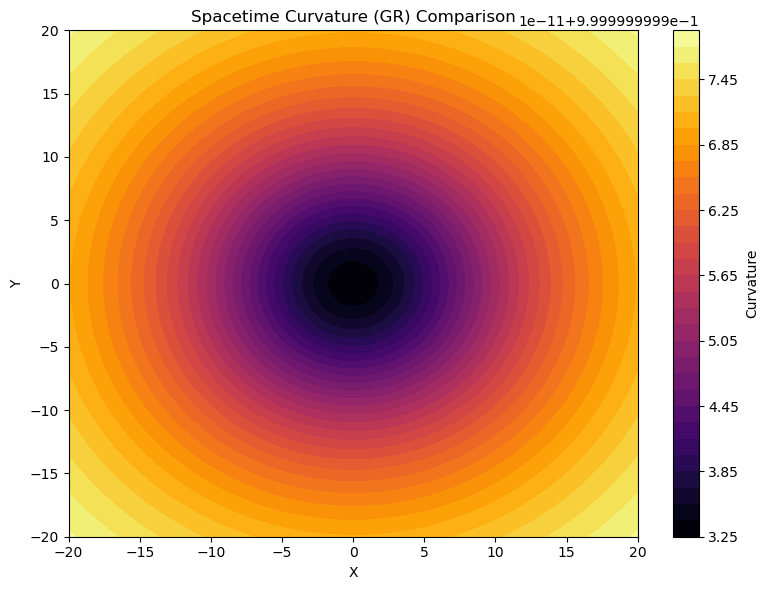

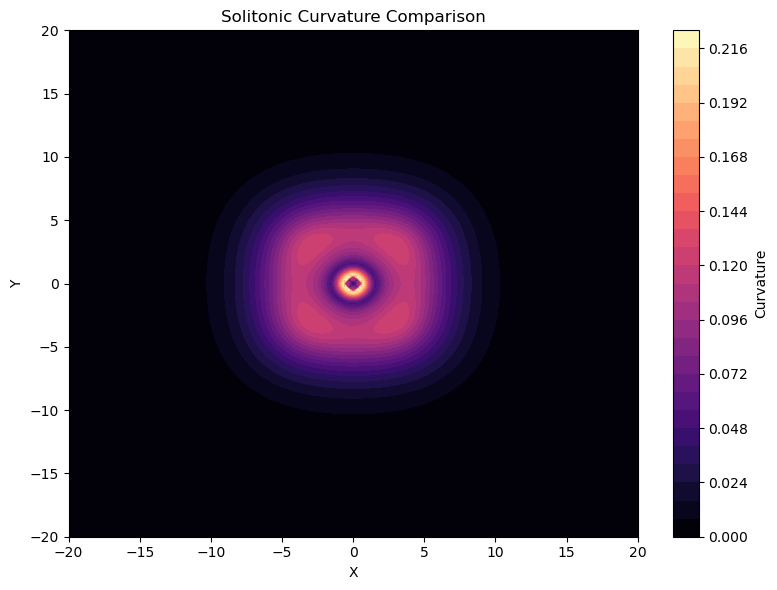

In [14]:
# For full soliton system 'field' lattice-system, akin to a quasi-particle lattice in a nonlinear 
# quantum field theory, where the lattice structure defines the interactions between solitons
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Set the grid size for the simulation
X = np.linspace(-20, 20, 200)
Y = np.linspace(-20, 20, 200)
Z = np.linspace(-20, 20, 200)
x, y, z = np.meshgrid(X, Y, Z)

# Define soliton parameters for the solitonic model
A1, A2 = 1.5, 1.2
w1, w2 = 1.5, 1.3
A_dark = -1.0
w_dark = 2.0

# Construct solitonic wavefunctions (bright and dark solitons) across the grid
soliton_grid = np.zeros_like(x, dtype=complex)

# Apply solitons across the grid
for i in range(-5, 6):
    for j in range(-5, 6):
        soliton_grid += A1 * np.cosh(np.sqrt((x - i)**2 + (y - j)**2) / w1)**-1 * np.exp(1j * 1.2 * z)
        soliton_grid += A2 * np.cosh(np.sqrt((x + i)**2 + (y + j)**2) / w2)**-1 * np.exp(1j * 0.8 * z)
        soliton_grid += A_dark * np.tanh(np.sqrt(x**2 + y**2) / w_dark)

# Normalize soliton grid
soliton_grid /= np.linalg.norm(soliton_grid)

# Compute the effective potential from the solitonic structure (probability density)
prob_density = np.abs(soliton_grid)**2
V_solitonic = -prob_density  # Potential energy of the solitonic system

# Compute the Newtonian potential for gravitational comparison
G = constants.G  # Gravitational constant
M = 5.0  # Mass of the central object
r = np.sqrt(x**2 + y**2 + z**2) + 1e-6  # Avoid division by zero
V_newtonian = -G * M / r  # Newtonian gravitational potential

# Normalize the potentials for fair comparison
V_newtonian /= np.max(np.abs(V_newtonian))
V_solitonic /= np.max(np.abs(V_solitonic))

# Compute the gradients (first derivatives) to get the effective gravitational field (force field)
gx_solitonic, gy_solitonic, gz_solitonic = np.gradient(V_solitonic, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])
gx_newtonian, gy_newtonian, gz_newtonian = np.gradient(V_newtonian, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])

# Calculate the effective gravitational fields (negative gradient of potential)
E_solitonic = -np.sqrt(gx_solitonic**2 + gy_solitonic**2 + gz_solitonic**2)
E_newtonian = -np.sqrt(gx_newtonian**2 + gy_newtonian**2 + gz_newtonian**2)

# Compute curvature-like quantities (gravitational curvature from the gradient of the force field)
def curvature_from_gradient(field):
    """Compute curvature-like term from the gradient of the force field"""
    gradient_x, gradient_y, gradient_z = np.gradient(field, X[1] - X[0], Y[1] - Y[0], Z[1] - Z[0])
    return np.sqrt(gradient_x**2 + gradient_y**2 + gradient_z**2)  # Approximation of curvature from the field gradient

# Compute curvature-like terms for the solitonic and Newtonian fields
curvature_solitonic = curvature_from_gradient(E_solitonic)
curvature_newtonian = curvature_from_gradient(E_newtonian)

# Calculate the curvature for General Relativity (Schwarzschild metric in weak-field approximation)
def schwarzschild_metric(r, G, M, c=1.0):
    """Approximate curvature using Schwarzschild metric for weak-field limit"""
    return (1 - 2 * G * M / (r * c**2))  # Curvature factor from GR

# Compute the gravitational curvature (weak-field GR curvature)
curvature_gr = schwarzschild_metric(r, G, M)

# Statistical analysis: compute mean, std, max, and min values
mean_solitonic = np.mean(curvature_solitonic)
std_solitonic = np.std(curvature_solitonic)
max_solitonic = np.max(curvature_solitonic)
min_solitonic = np.min(curvature_solitonic)

mean_gr = np.mean(curvature_gr)
std_gr = np.std(curvature_gr)
max_gr = np.max(curvature_gr)
min_gr = np.min(curvature_gr)

# Compute the overlap integral of curvature between the solitonic field and GR
overlap = np.sum(curvature_solitonic * curvature_gr)

# Output the results for analysis
print(f"Energy of Solitonic Potential: {np.sum(V_solitonic):.6f}")
print(f"Energy of Newtonian Potential: {np.sum(V_newtonian):.6f}")
print(f"Overlap Integral between Solitonic and Newtonian Potentials: {np.sum(V_solitonic * V_newtonian):.6f}")
print(f"Mean Force Field Difference: {np.mean(E_solitonic - E_newtonian):.6f}")
print(f"Standard Deviation of Force Field Difference: {np.std(E_solitonic - E_newtonian):.6f}")
print(f"Maximum Force Field Difference: {np.max(E_solitonic - E_newtonian):.6f}")
print(f"Minimum Force Field Difference: {np.min(E_solitonic - E_newtonian):.6f}")

# Curvature Comparison between Solitonic and General Relativity
print(f"Mean Solitonic Curvature: {mean_solitonic:.6f}")
print(f"Standard Deviation of Solitonic Curvature: {std_solitonic:.6f}")
print(f"Maximum Solitonic Curvature: {max_solitonic:.6f}")
print(f"Minimum Solitonic Curvature: {min_solitonic:.6f}")

print(f"Mean GR Curvature: {mean_gr:.6f}")
print(f"Standard Deviation of GR Curvature: {std_gr:.6f}")
print(f"Maximum GR Curvature: {max_gr:.6f}")
print(f"Minimum GR Curvature: {min_gr:.6f}")

# Print Overlap Integral
print(f"Overlap Integral between Solitonic and GR Curvature: {overlap:.6f}")

# Curvature Comparison Plot (GR vs Solitonic)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot GR curvature
cp3 = ax.contourf(x[:, :, 50], y[:, :, 50], curvature_gr[:, :, 50], levels=30, cmap='inferno')
ax.set_title("Spacetime Curvature (GR) Comparison")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.colorbar(cp3, ax=ax, label="Curvature")
plt.tight_layout()
plt.show()

# Plot Solitonic curvature
fig, ax2 = plt.subplots(figsize=(8, 6))
cp4 = ax2.contourf(x[:, :, 50], y[:, :, 50], curvature_solitonic[:, :, 50], levels=30, cmap='magma')
ax2.set_title("Solitonic Curvature Comparison")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
fig.colorbar(cp4, ax=ax2, label="Curvature")
plt.tight_layout()
plt.show()
